# تحليل بيانات حملة اشهارية


In [9]:
# تحميل المكتبات
import pandas as pd

In [10]:
#  تحمل ملف قاعدة البيانات 
df=pd.read_csv("./data/Advertising.csv")

In [11]:
# اظهار البيانات
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
# حجم البيانات
df.shape

(200, 5)

In [15]:
# تحميل مكتبة التخطيطات البيانية
import seaborn as sns
%matplotlib inline

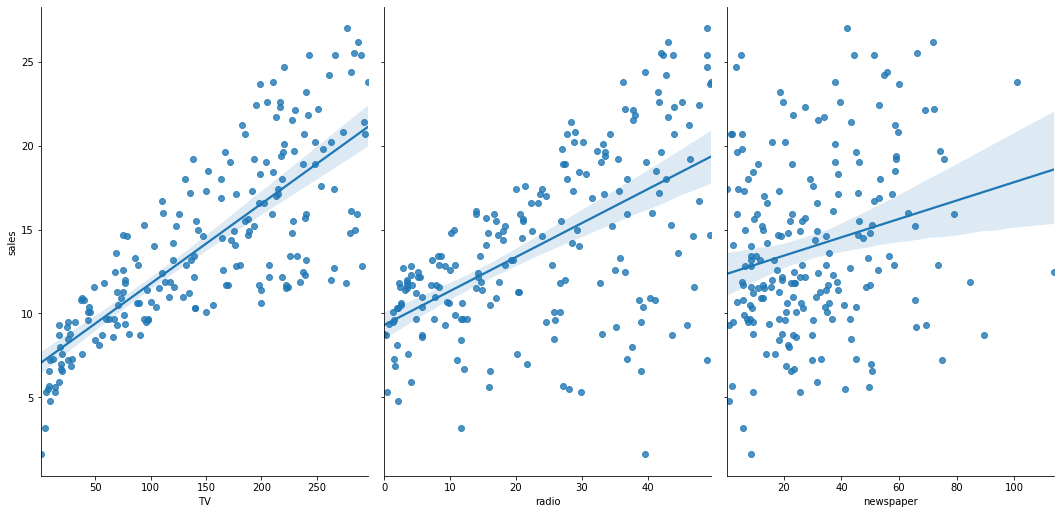

In [16]:
# التخطيطات البيانية 
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales", height=7, aspect=.7, kind="reg")

In [21]:
!pip3 install scikit-learn

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [22]:
#(features & Target) تحديد البيانات المستقلة  و الهدف
X=df[["TV", "radio", "newspaper"]]
y=df["sales"]

In [23]:
X.shape, y.shape

((200, 3), (200,))

In [24]:
#  ( train & test) تقسيم البيانات الى بيانات تدريبية واخرى اختبارية. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=.3, random_state=42)

In [25]:
# تحميل خوارزمية الانحدار الخطي
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [26]:
# تدريب البيانات
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#y تقاطع. 
reg.intercept_

2.7089490925159136

In [28]:
#   تحديد المعاملات
reg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

$\large y =b_0 +b_1x_1+b_2x_2+...+b_nx_n$

$\large  b_0= y intercept$

$\large b_i = coeficients$

In [29]:
# التنبؤ
y_pred=reg.predict(X_test)

In [30]:
# تقويم آداء خوارزمية الانحدار الخطي
from sklearn import metrics
# MAE
metrics.mean_absolute_error(y_test, y_pred)

1.5116692224549089

In [31]:

# بتحييد القيم المتطرفة MSE  تقوم
metrics.mean_squared_error(y_pred, y_test)

3.796797236715222

In [32]:
#RMSE   
import numpy as np
np.sqrt(metrics.mean_squared_error(y_pred, y_test))

1.9485372043446392

In [33]:
metrics.r2_score(y_pred, y_test)

0.8467730707328174

In [ ]:
! pip3 install --user  statsmodels

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
sns.residplot(y_pred, y_test , data=df
,  lowess=True, 
              line_kws={'color':'red', 'lw':1, 'alpha':1})
plt.xlabel("Fitted Values")
plt.title(" Residual plot")

In [ ]:
stats.probplot( y_pred-y_test, dist='norm', plot=plt)
plt.show()

## Scale location plot

In [ ]:
# homoscedasticity

sns.regplot( 
y_pred, np.sqrt(np.abs(y_pred-y_test)),
    scatter=True , lowess=True, line_kws={"color":"red", "lw":1, "alpha":0.8}
    
)

##   Risidual   
https://bit.ly/2WI8Oov

### Assumptions:
- linearity:
- Independances :  Erros re independants of each other
- Homoscedasticity ( costance variance  of erros ).
- Normality 
Keep an eye on outliers, 





In [1]:
! pwd

/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project/MLCourse/Labs/Lab_regression


# Pivot Table

In [34]:
import seaborn  as sns

In [35]:
# load data
df=sns.load_dataset("tips")

In [36]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB


In [38]:
# implement Pivot table
import pandas as pd

In [39]:
pd.pivot_table(data=df,  index=["day", "time"], values="total_bill", aggfunc="median")

total_bill
day  time              
Thur Lunch       16.000
     Dinner      18.780
Fri  Lunch       13.420
     Dinner      18.665
Sat  Dinner      18.240
Sun  Dinner      19.630

In [40]:
df.keys()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [41]:
pd.pivot_table(data=df,  index=["day", "time"], 
               values=["total_bill", "tip"], aggfunc={"total_bill":"median", "tip":"max"})

tip  total_bill
day  time                     
Thur Lunch    6.70      16.000
     Dinner   3.00      18.780
Fri  Lunch    3.48      13.420
     Dinner   4.73      18.665
Sat  Dinner  10.00      18.240
Sun  Dinner   6.50      19.630

In [9]:
df.keys()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
pd.